## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
# loading dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
# number of rows in the dataset
N_rows = df.shape[0]
N_rows

294478

c. The number of unique users in the dataset.

In [6]:
# number of unique user_ids in dataset
N_unique= df['user_id'].nunique()
N_unique

290584

d. The proportion of users converted.

In [7]:
# calculating the conversion rate in dataset
Prop_users = df['converted'].sum()/df.shape[0]
Prop_users

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
# number of miss match rows
N_no_match=len(df.query("(landing_page =='new_page'and group !='treatment') or (landing_page !='new_page'and group =='treatment')"))
N_no_match

3893

f. Do any of the rows have missing values?

In [9]:
# getting data info to see if the is any missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**The above show that there are no missing values**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# droping miss matched rows
df2 = df.query("not((landing_page =='new_page'and group !='treatment') or (landing_page !='new_page'and group =='treatment'))")
len(df2)

290585

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# number of unique user_ids in dataset
N_user_unique = df2['user_id'].nunique()
N_user_unique

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# rows of duplicate user_id
duplicate_user = df2[df2.duplicated(subset='user_id' , keep=False)]['user_id']
duplicate_user


1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
# information of the duplicate user_id
duplicate_user_row = df2[df2.duplicated(subset='user_id' , keep="first")]
duplicate_user_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# droping the second duplicate
df2.drop(df2[df2.duplicated(subset='user_id' , keep="first")].index,inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#probability of user conversion
convert_Prob = df2['converted'].mean()
convert_Prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#probability of control user conversion
control_convert_Prob =df2.query('group == "control"')['converted'].mean()
control_convert_Prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#probability of treatment user conversion
treatment_convert_Prob= df2.query('group == "treatment"')['converted'].mean()
treatment_convert_Prob


0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#probability of user receiveing the new page
new_page_Prob=len(df2.query('group == "treatment"'))/df2.shape[0]
new_page_Prob

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The difference between the probabilities of the page conversion between the treatment and control groups is small and seems to be not that significant. Thus, we don’t have sufficient evidence to suggest which page the company should implement give the data we need go through further analysis such as Hypothesis Testing. However, the difference might be significant if its tested with a larger sample.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0:P_{old}    -    P_{new}   \ge    0$$
$$H_1:P_{old}    -    P_{new}   \lt    0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
# conversion rate under the null hypothesis
P_new_null = df2["converted"].mean()
P_new_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
# conversion rate under the null hypothesis
P_old_null = df2["converted"].mean()
P_old_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
# count of user in treatment group
N_new = df2.query('group == "treatment"').shape[0]
N_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
# count of user in control group
N_old = df2.query('group == "control"').shape[0]
N_old


145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# Simulating new page conversion rate under the null
new_page_converted = np.random.binomial(1,p=P_new_null, size=N_new)
new_page_converted 

array([1, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# Simulating old page conversion rate under the null
old_page_converted = np.random.binomial(1,p=P_old_null, size=N_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
P_diffrence = new_page_converted.mean()-old_page_converted.mean()
P_diffrence

0.0016016446462619877

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
# Simulateing the 10,000 tests for the average of n_old and n_new binomial then append the convertsion retes to p_diffs
p_diffs = []
for _ in range(10000):
    old_page_converted_boost = np.random.binomial(1,p=P_old_null, size=N_old).mean()
    new_page_converted_boost = np.random.binomial(1,p=P_new_null, size=N_new).mean()
    p_diffs.append(new_page_converted_boost - old_page_converted_boost)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

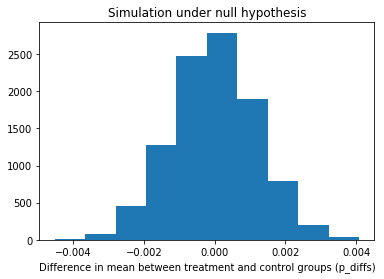

In [28]:
plt.hist(p_diffs);
plt.title('Simulation under null hypothesis');
plt.xlabel('Difference in mean between treatment and control groups (p_diffs)');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# computing the actual difference observed
actual_difference = treatment_convert_Prob - control_convert_Prob
#  computing proportion of p_diffs that are greater than the actual difference observed
actual_difference,(p_diffs >actual_difference).mean()

(-0.0015782389853555567, 0.90700000000000003)

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P-value is the proportion of p_diffs which greater than the actual difference observed in the data.**

**the p-value is the probability of seeing a particular result assuming that the null hypothesis is True. (conductrics.com)**

**A small p-value (lesser than alpha = 0.05))implies that the we can reject the null hypothesis. However the p-value here is quite large thus we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
# computing counts from dataset
convert_old = df2.query("converted == 1 and group == 'control'").shape[0]
convert_new = df2.query("converted == 1 and group == 'treatment'").shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
#use stats.proportions_ztest to compute Z-score and p-value
z_scr, p_val= sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')
z_scr, p_val

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is. (statisticshowto.com)**

**Assumeing confidence level is 95% then our crital value is 1.96.
Our test is a test for the difference thus it a two-tail test making a z score that falls past -1.96 or 1.96 significant making us reject the null hypothesis. (statisticshowto.com)  
The z-score that we got is -1.310924
Which is less than critical value of 1.96 thus we fail to reject null hypothesis.**

**Also th p-value is 0.9050 is close to calucuated p-value 0.9058 which is greater the alpha/2 thus we fail to reject null hypothesis.**

**So, Yes, the result agree's with the findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#copying dataframe
df3 = df2.copy()
#setting Intercept
df3['intercept']=1
# Creating dummy values for group
df3[['to_drop', 'ab_page']] = pd.get_dummies(df3['group'])
#droping_exrta_column
df3.drop(['to_drop'], axis=1, inplace=True)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
# defing the regression model
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
# fitting the model and getting th results of the fitting
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:23:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
# inverte exponential of the coefficient < 0 defines the relationship to the base variable
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190. while the previous p-value was almost 0.90**

**The hypothesis here are:**
$$H_0:P_{old}    -    P_{new}   =    0$$
$$H_1:P_{old}    -    P_{new}   \neq    0$$

**The null hypothesis here states that there is no relationship between  user landing page and the conversion rate, and the alternative hypothesis states that there is a relationship between them. While in Part II, the null hypothesis was that the P_value of old page is greater than or equal to P_value of new page, and the alternative hypothesis stated that the P_value of old page is less than P_value of new page.**

**The large difference in the p-values maybe due to that in Part II that one page conversion rate will be geater than the other, while here in Part III, only predicted if there is a difference.**



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It would be a good  idea to consider other factors to add into the regression model such the decive the the page was loaded into, time of day of the user activity on the page and the user's age.** 
**These factoers might influence the user's experience with pages and eventually, the conversions rate** 
**A Possible disadvantage adding othr factors is the in might add the complexity of the modle , due to  variables dependencies (variables  affect each other).**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
# loading countries dataset for converted and ab_page
df_countries = pd.read_csv('./countries.csv')
df_countries.head()
# Joining df_countries with df3 on user_id
df4 = df3.join(df_countries.set_index('user_id'), on='user_id' )
# getting dummies values for country
df4[['CA','UK']] = pd.get_dummies(df4['country'])[['CA','UK']]
df4.head(20)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0


In [36]:
# defing the regression model for converted , ab_page and the country
log_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page','CA', 'UK']])
# fitting the model and getting th results of the fitting
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        19:23:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [37]:
#1. The difference in the probability of converting for the old and new pages, CA and US, and UK and US
# while other variables remain constant
1/np.exp(-0.0149), 1/np.exp(-0.0408), np.exp(0.0099)

(1.0150115583846535, 1.0416437559600236, 1.0099491671175422)

**The result of the logistic regression on landing page and the country shows no significant correlation between them given the large P-values. This indicates that fail to reject the Null Hypothesis**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
df4['CA_ab_page'] = df4['CA'] * df4['ab_page']
df4['UK_ab_page'] = df4['UK'] * df4['ab_page']
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,CA_ab_page,UK_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,0


In [42]:
# defing the regression model for converted, and the interaction between country and the landing page
log_mod = sm.Logit(df4['converted'], df4[['intercept', 'ab_page','CA', 'UK', 'CA_ab_page','UK_ab_page']])
# fitting the model and getting th results of the fitting
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        19:31:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [44]:
#1. The difference in the probability of the interaction between country and the landing page, converting for the 
# old and new pages, CA and US, and UK and US while other variables remain constant
1/np.exp(-0.0469), np.exp(0.0314) , 1/np.exp(-0.0206), 1/np.exp(-0.0175), 1/np.exp(-0.0057) , 

(1.0480172021191829,
 1.0318981806179213,
 1.0208136445037459,
 1.0176540221507617,
 1.0057162759095335)

**The result of the logistic regression on landing page and the country shows there is no sufficient evidence that indicate that there is an interaction between the user’s country and landing page that will help to predict page conversion given the large P-values. This indicates that fail to reject the Null Hypothesis.**

# Conclusions

**The p-values that were produced using the different statistical approaches: probabilities, hypothesis testing, z-score and regression approach, shows that there are no enough evidence to reject the null hypothesis.**

**Thus, we conclude that there will be no significant improvements in implementing the new page** 

## Resources

- https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/#zscorereallife
- https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/
- https://conductrics.com/pvalues

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0